In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python, Data Mining, ETC/Datasets/diamonds.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df['clarity'].mode()

0    SI1
Name: clarity, dtype: object

In [ ]:
df['cut'].mode()

0    Ideal
Name: cut, dtype: object

In [ ]:
df['price'].mode()

0    605
Name: price, dtype: int64

In [ ]:
df['carat'].mode()

0    0.3
Name: carat, dtype: float64

In [ ]:
df['carat'].mean()

0.7979397478680014

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Axes: xlabel='price', ylabel='Count'>

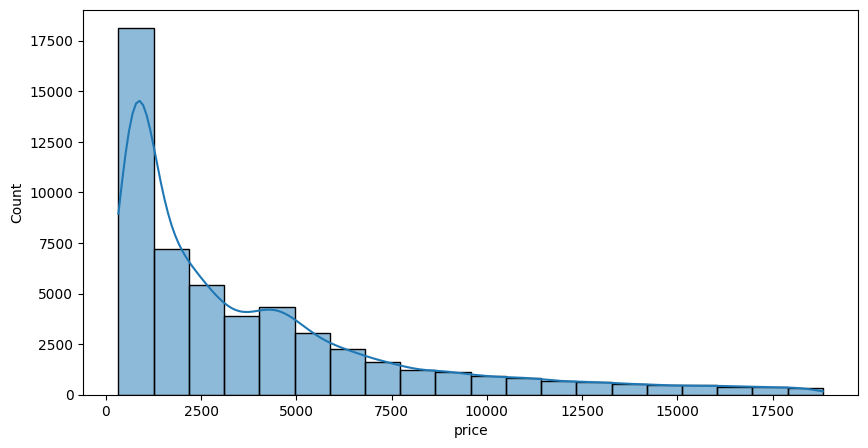

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(df['price'], bins = 20, kde=True)

<Axes: xlabel='carat', ylabel='Count'>

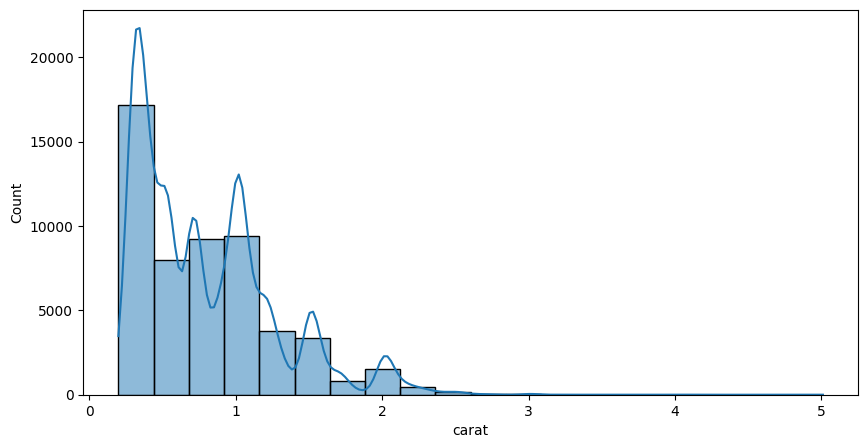

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(df['carat'], bins=20, kde=True)

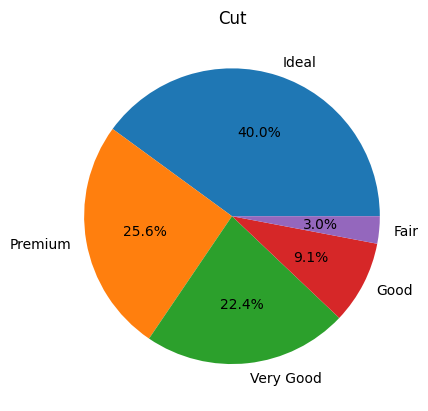

In [ ]:
plt.pie(df['cut'].value_counts(),labels=['Ideal','Premium','Very Good','Good','Fair'],autopct='%1.1f%%')
plt.title('Cut')
plt.show()

<Axes: xlabel='cut', ylabel='price'>

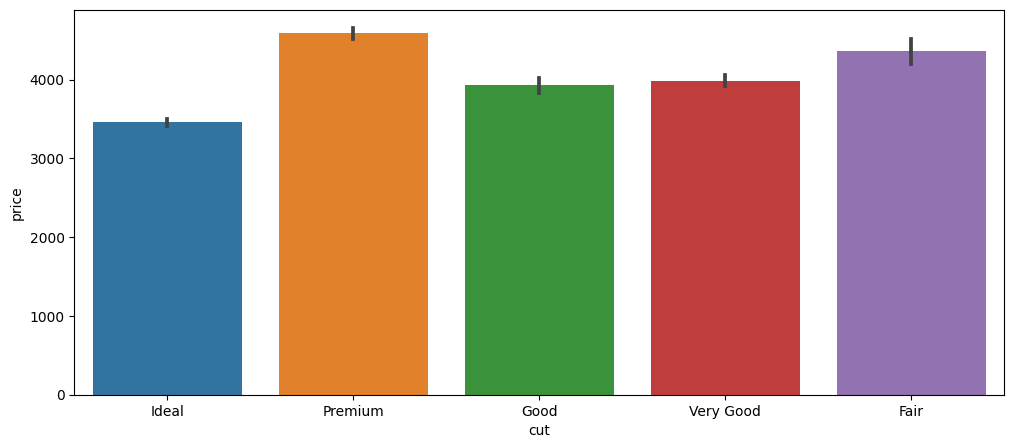

In [ ]:
plt.figure(figsize = (12, 5))
sns.barplot(x='cut',
            y='price',
            data = df)

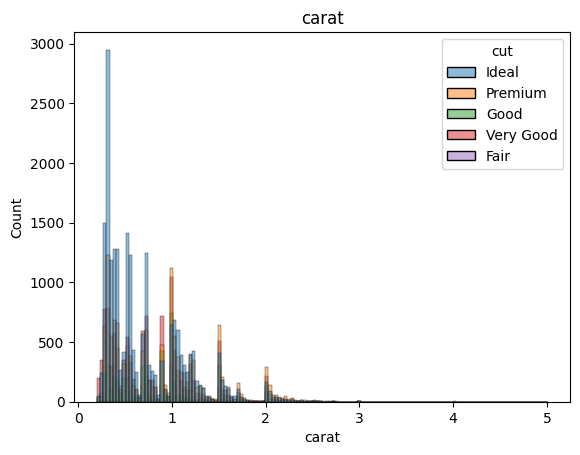

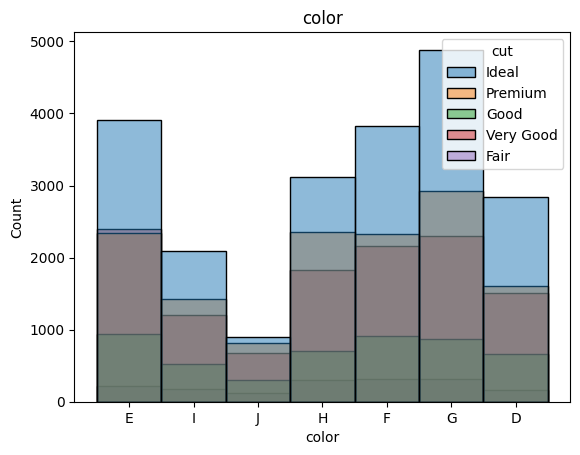

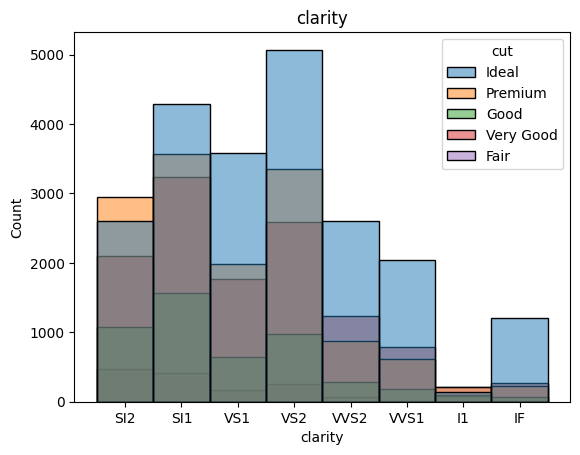

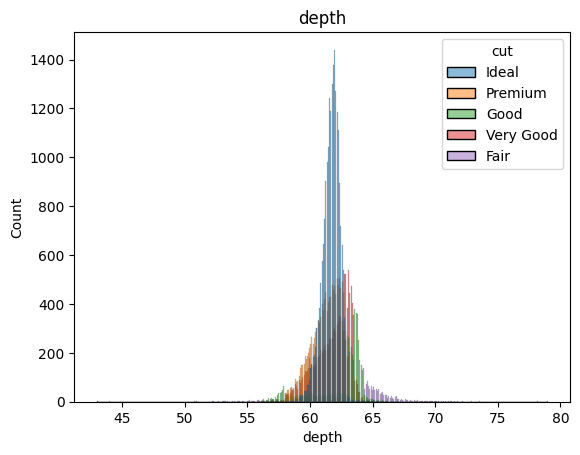

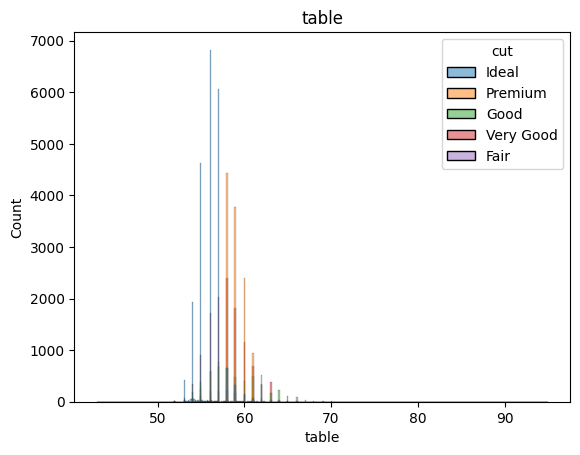

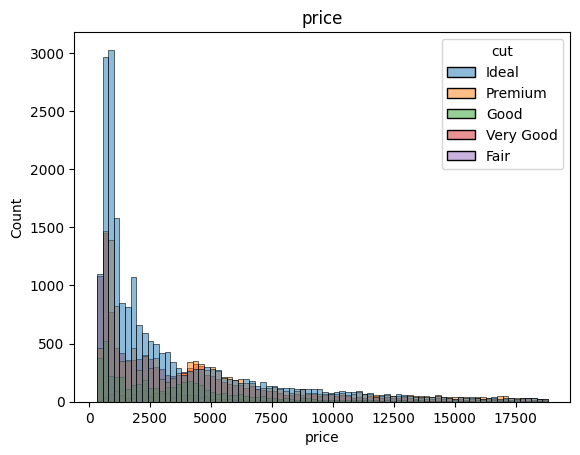

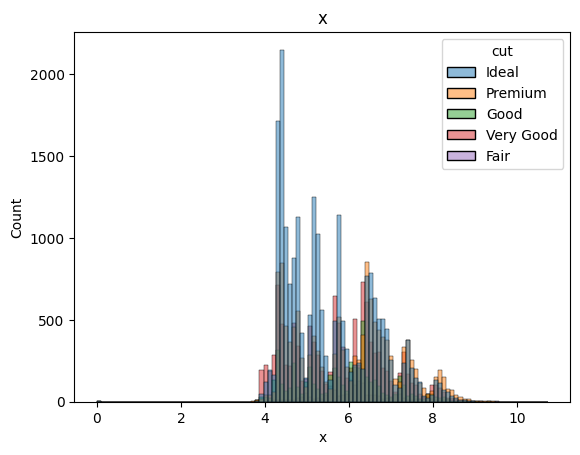

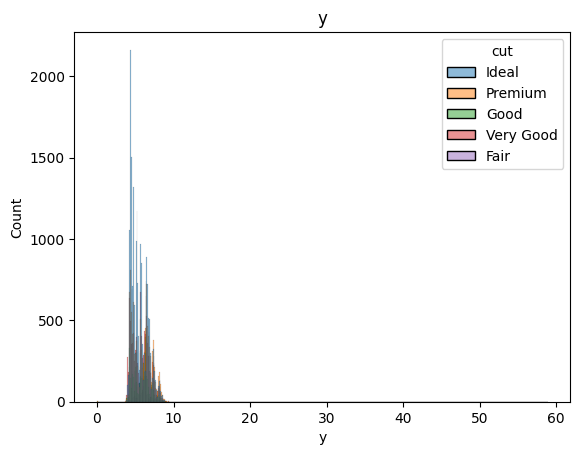

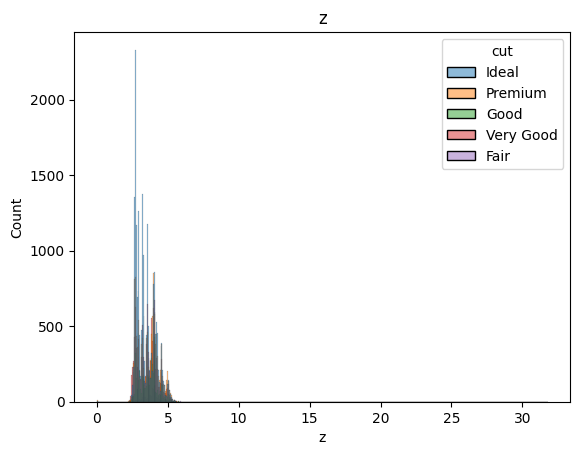

In [ ]:
col_list = df.columns.tolist()
col_list.remove('cut')

for col in col_list:
  plt.title(col)
  sns.histplot(x=col, data=df, hue='cut')
  plt.show()

## Removing outliers

In [ ]:
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]

df.shape

(53907, 10)

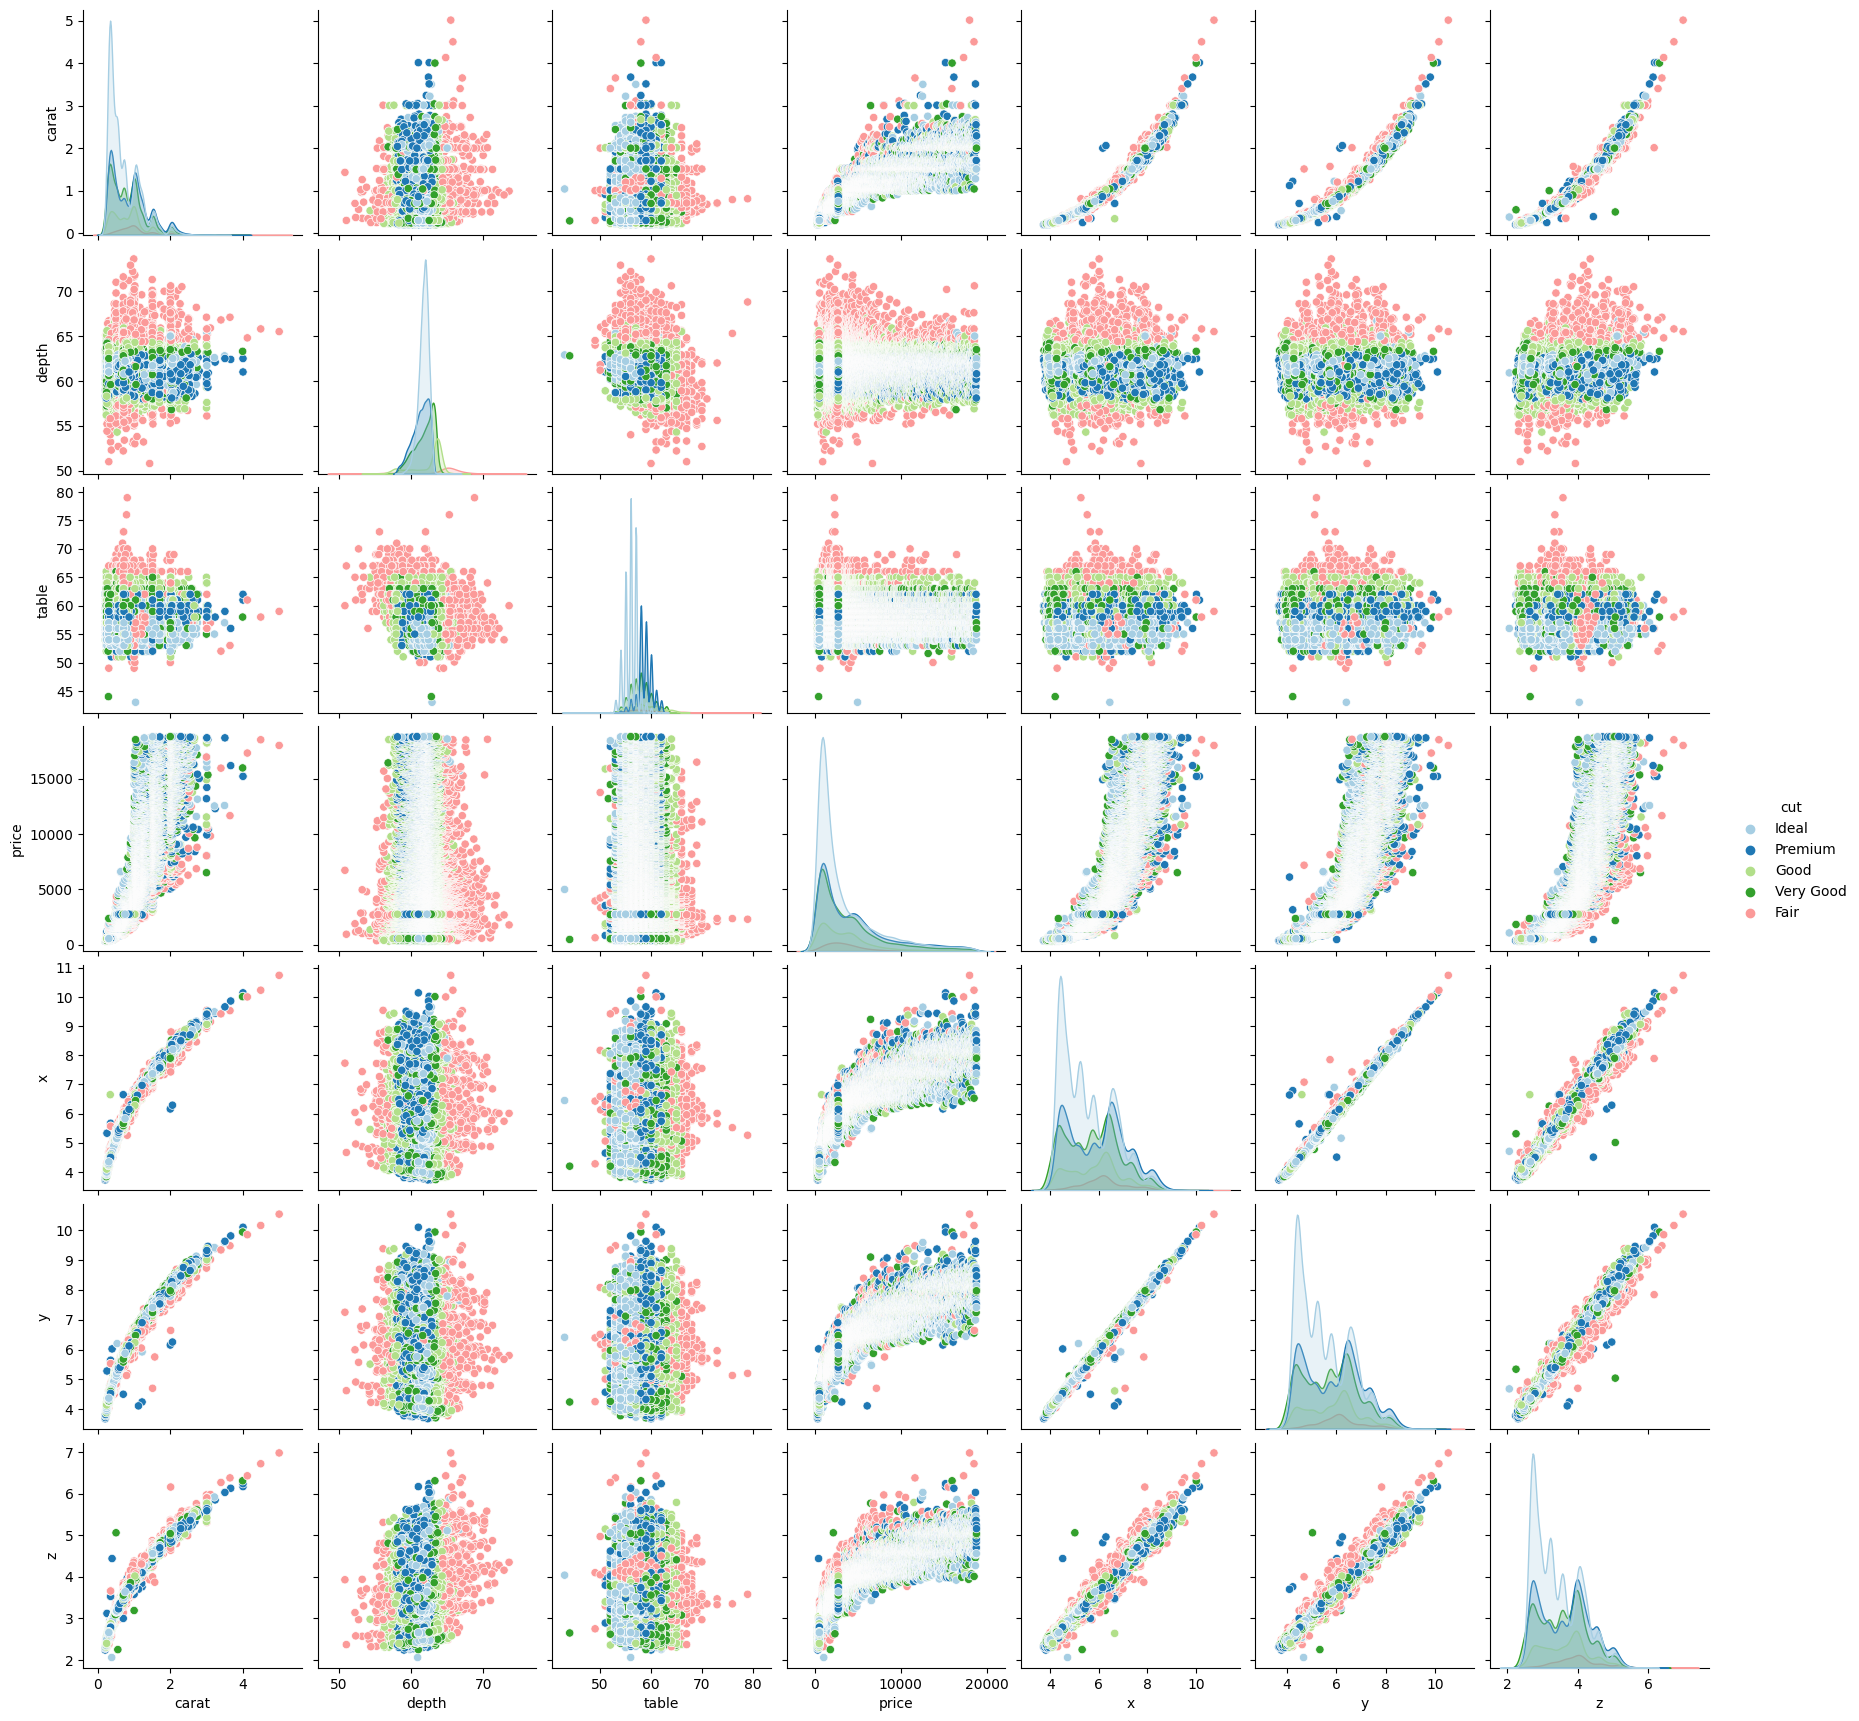

In [ ]:
sns.pairplot(data=df, hue='cut', palette='Paired')
plt.show()

In [ ]:
# List of categorical
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


<ipython-input-22-61da64aa59aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


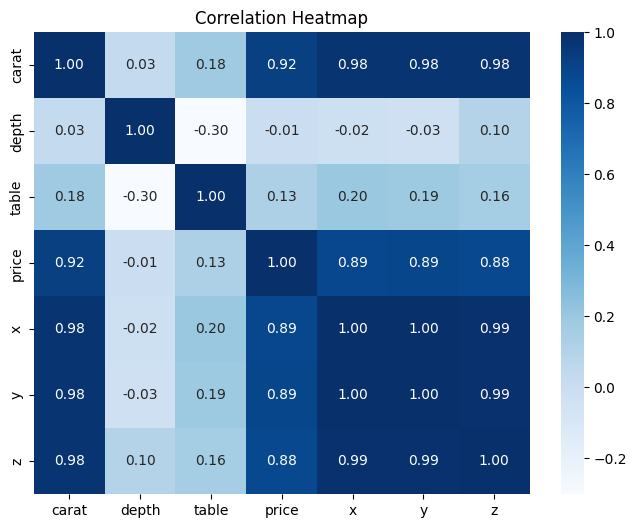

In [ ]:

corr_matrix = df.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

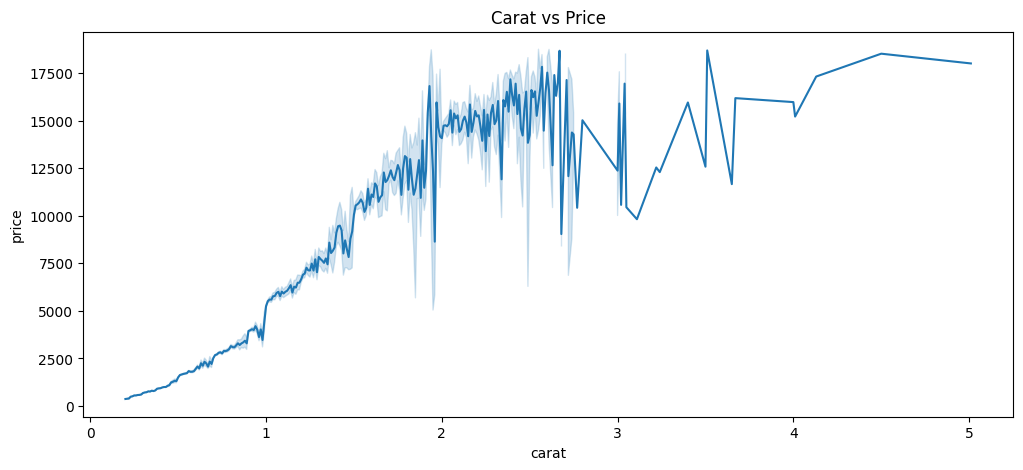

In [ ]:
plt.figure(figsize = (12, 5))
sns.lineplot(x='carat',
             y='price',
             data = df)
plt.title('Carat vs Price')
plt.show()

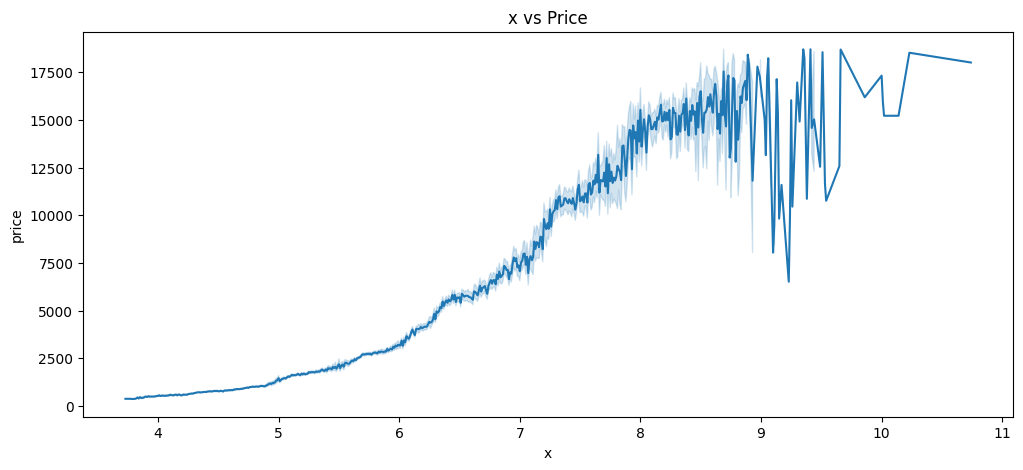

In [ ]:
plt.figure(figsize = (12, 5))
sns.lineplot(x='x',
             y='price',
             data = df)
plt.title('x vs Price')
plt.show()

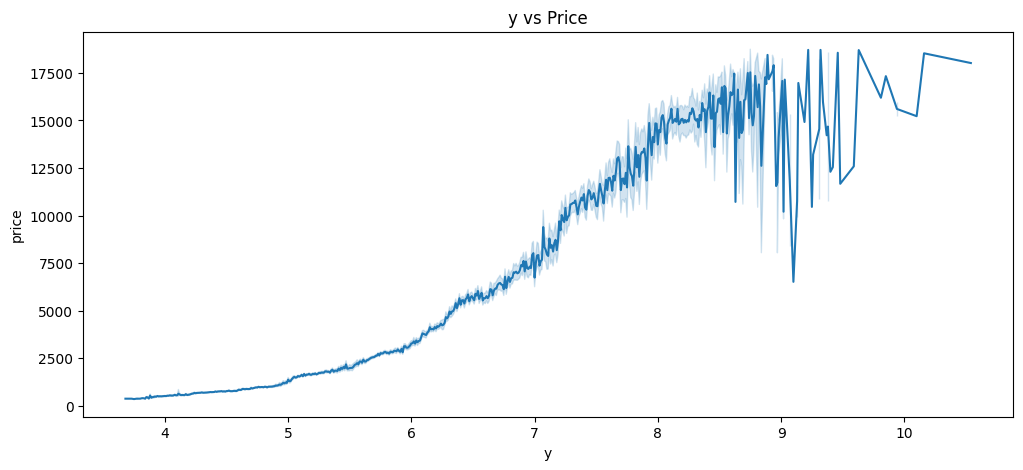

In [ ]:
plt.figure(figsize = (12, 5))
sns.lineplot(x='y',
             y='price',
             data = df)
plt.title('y vs Price')
plt.show()

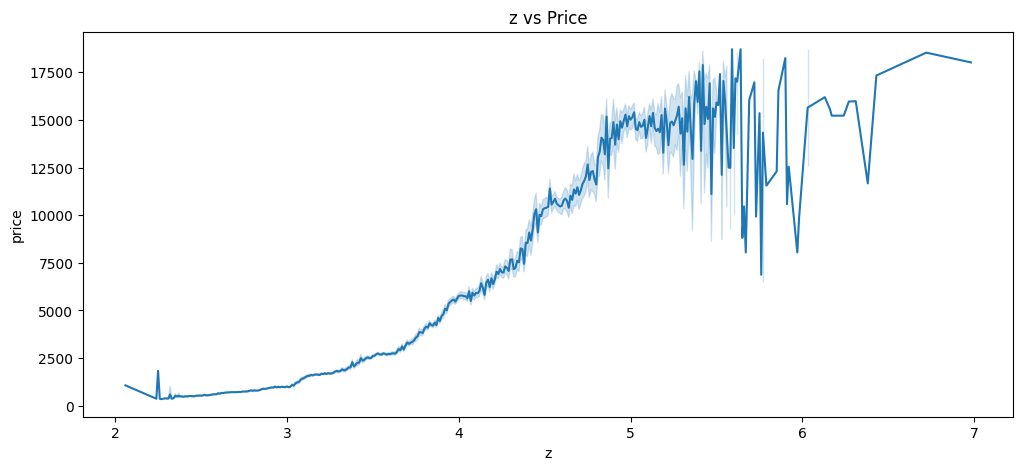

In [ ]:
plt.figure(figsize = (12, 5))
sns.lineplot(x='z',
             y='price',
             data = df)
plt.title('z vs Price')
plt.show()

# Label Encoding for categorical data


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder #Package for encoding

In [ ]:
# make copy of data
df_labeled = df.copy()
le = LabelEncoder()
for col in object_cols:
  df_labeled[col] = le.fit_transform(df_labeled[col])
df_labeled.head()
# Use no-loop method to transform

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


# Modelling


In [ ]:
# Import library for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
X = df_labeled.drop(["price"],axis =1)
y = df_labeled["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(43125, 9)

In [ ]:
X_test.shape

(10782, 9)

In [ ]:
print("\nFirst few rows of Train Data:")
print("X_train:")
print(X_train[:5])  # First 5 rows of X_train
print("\ny_train:")
print(y_train[:5])  # First 5 rows of y_train

print("\nFirst few rows of Test Data:")
print("X_test:")
print(X_test[:5])  # Displaying the first 5 rows of X_test
print("\ny_test:")
print(y_test[:5])


First few rows of Train Data:
X_train:
       carat  cut  color  clarity  depth  table     x     y     z
41069   0.51    2      4        2   59.9   56.0  5.19  5.23  3.12
2012    0.78    3      0        2   61.8   59.0  5.93  5.88  3.65
23555   1.51    3      1        2   62.6   55.0  7.33  7.25  4.56
7231    1.01    4      6        2   63.0   54.0  6.35  6.41  4.02
46595   0.54    2      2        5   61.4   57.0  5.25  5.20  3.21

y_train:
41069     1192
2012      3103
23555    11565
7231      4194
46595     1786
Name: price, dtype: int64

First few rows of Test Data:
X_test:
       carat  cut  color  clarity  depth  table     x     y     z
26764   1.69    3      2        5   58.7   59.0  7.87  7.78  4.59
44666   0.36    2      5        5   61.8   55.0  4.60  4.63  2.85
29023   0.31    2      3        7   60.8   56.0  4.41  4.44  2.69
25603   2.08    3      4        3   58.8   60.0  8.39  8.35  4.92
29363   0.31    3      3        5   61.5   59.0  4.35  4.33  2.67

y_test:
26764    1

In [ ]:
# pipeline code for multiple cross validation comparison (MSE)
pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                       ("lr", LinearRegression())])

pipeline_dt = Pipeline([("scalar2", StandardScaler()),
                       ("dt", DecisionTreeRegressor())])

pipeline_xgb = Pipeline([("scalar3", StandardScaler()),
                       ("xgb", XGBRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


In [ ]:
# List of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_xgb, pipeline_rf, pipeline_kn]

In [ ]:
pipeline_dict = {0: "LinearRegression", 1: "DecisionTreeRegressor", 2: "XGBRegressor", 3: "RandomForestRegressor", 4: "KNeighborsRegressor"}

In [ ]:
#Pipeline Fitting
for pipe in pipelines:
  pipe.fit(X_train, y_train)

In [ ]:
# Print result for rmse
result_crossvalidation_rms = [] #Data stprage
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    result_crossvalidation_rms.append(cv_score)
    print(f"{pipeline_dict[i]}: {-1 * cv_score.mean()} ")

LinearRegression: 1345.0201652238716 
DecisionTreeRegressor: 744.0979763884798 
XGBRegressor: 550.2503189256935 
RandomForestRegressor: 549.8143411732796 
KNeighborsRegressor: 807.2818833023348 


## Random forest and XGBRegressor has the similiar rms, let's test them both


R2 Accuracy

In [ ]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))


R^2: 0.9803541285503744


In [ ]:
pred2 = pipeline_rf.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred2))

R^2: 0.9794449756280751


In [ ]:
# Actual price (Train and test)

# RF fit
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# XGBfit
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# RF Train test
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# XGBoost Train Test
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)

In [ ]:
# Print random forest model
print("Random Forest Model:")
print("Train - Actual Prices:", y_train[:5])
print("Train - Predicted Prices:", rf_train_pred[:5])
print("Test - Actual Prices:", y_test[:5])
print("Test - Predicted Prices:", rf_test_pred[:5])
# Scatter plot for visualiztion ()

Random Forest Model:
Train - Actual Prices: 41069     1192
2012      3103
23555    11565
7231      4194
46595     1786
Name: price, dtype: int64
Train - Predicted Prices: [ 1193.68        3074.15       11584.18        3948.36066667
  1816.13      ]
Test - Actual Prices: 26764    16583
44666      523
29023      687
25603    14462
29363      698
Name: price, dtype: int64
Test - Predicted Prices: [16389.68    538.869   725.89  13434.23    667.69 ]


In [ ]:
#Print XGBoost Model
print("XGBoost Model:")
print("Train - Actual Prices:", y_train[:5])
print("Train - Predicted Prices:", xgb_train_pred[:5])
print("Test - Actual Prices:", y_test[:5])
print("Test - Predicted Prices:", xgb_test_pred[:5])

XGBoost Model:
Train - Actual Prices: 41069     1192
2012      3103
23555    11565
7231      4194
46595     1786
Name: price, dtype: int64
Train - Predicted Prices: [ 1220.6454  3064.2192 11577.928   4147.123   1697.0989]
Test - Actual Prices: 26764    16583
44666      523
29023      687
25603    14462
29363      698
Name: price, dtype: int64
Test - Predicted Prices: [15161.162     601.1654    791.7556  15218.397     704.85284]


#Prediction Visualization

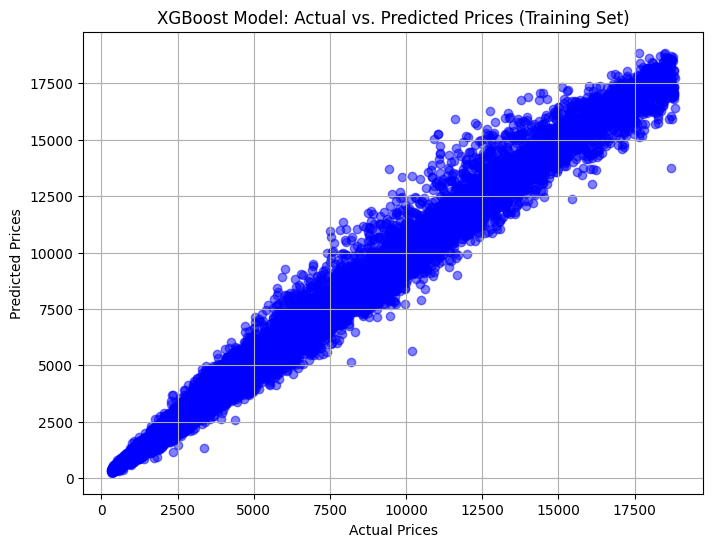

In [ ]:
# XGBoost Train
plt.figure(figsize=(8, 6))
plt.scatter(y_train, xgb_train_pred, color='blue', alpha=0.5)
plt.title('XGBoost Model: Actual vs. Predicted Prices (Training Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

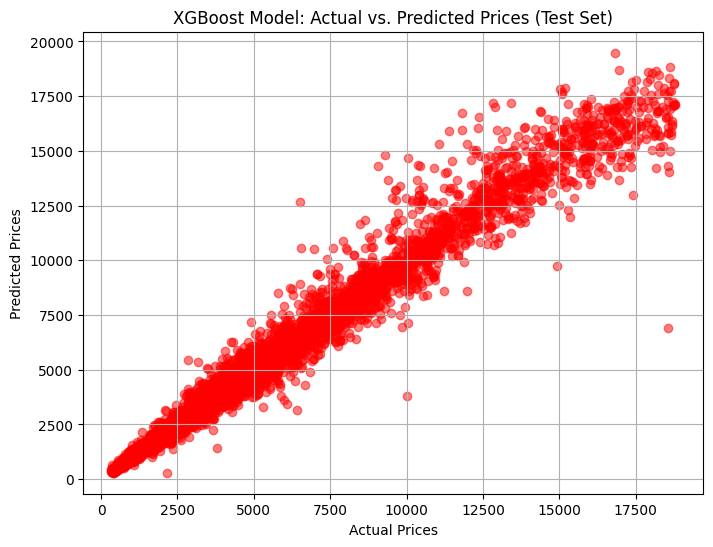

In [ ]:
#XGBoost Test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_test_pred, color='red', alpha=0.5)
plt.title('XGBoost Model: Actual vs. Predicted Prices (Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

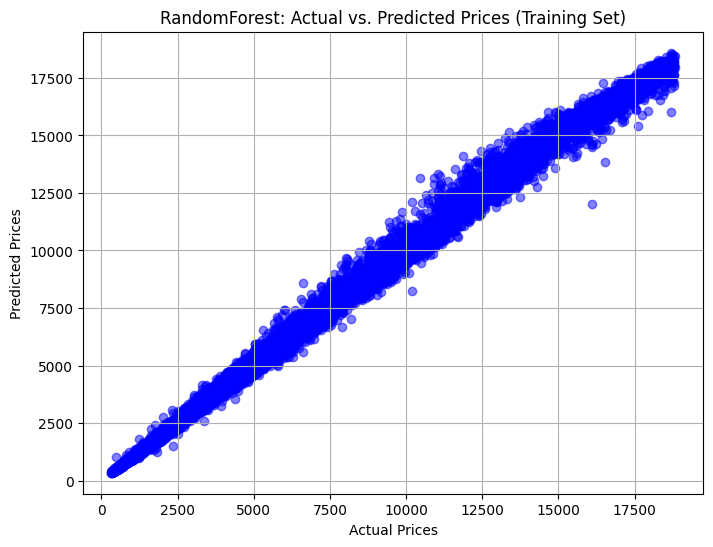

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, rf_train_pred, color='blue', alpha=0.5)
plt.title('RandomForest: Actual vs. Predicted Prices (Training Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

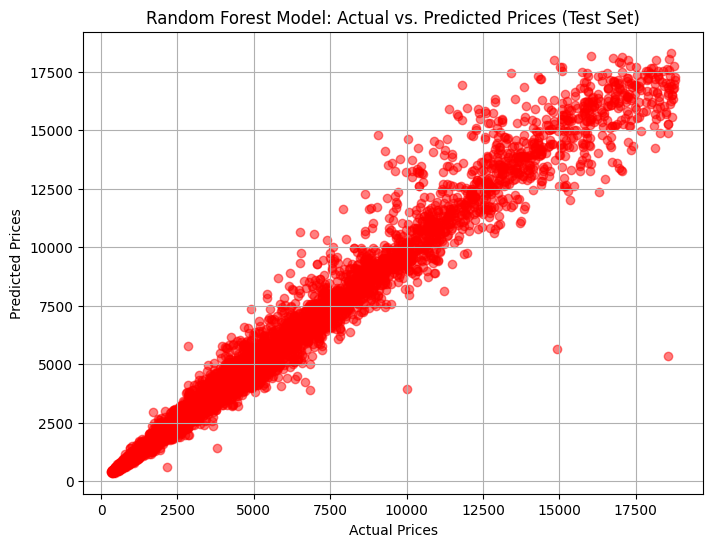

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_test_pred, color='red', alpha=0.5)
plt.title('Random Forest Model: Actual vs. Predicted Prices (Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
# SHAP Model evaluation
!pip install shap

In [ ]:
import shap

<function matplotlib.pyplot.show(close=None, block=None)>

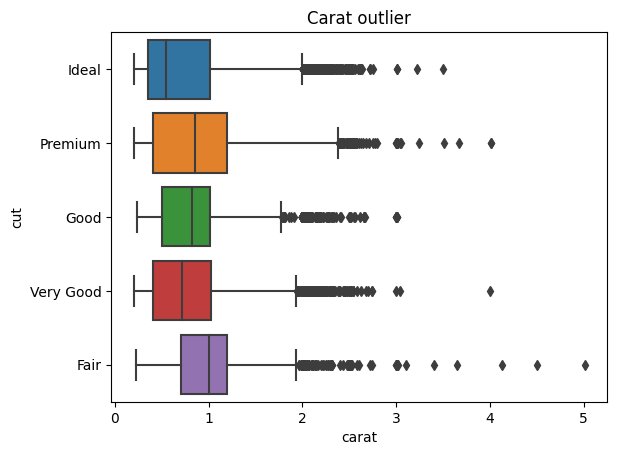

In [ ]:
sns.boxplot(data=df, x='carat', y='cut')
plt.title('Carat outlier')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

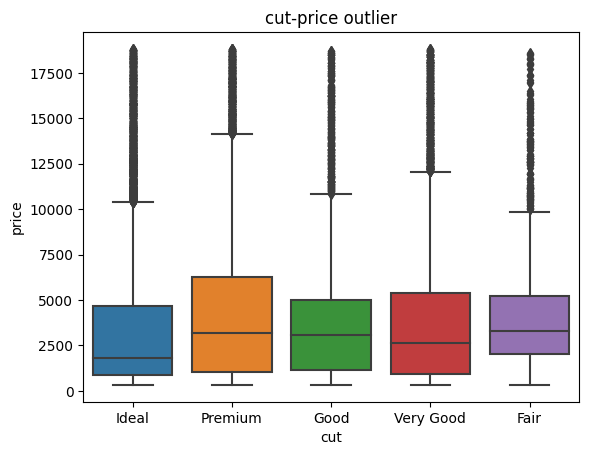

In [ ]:
sns.boxplot(data=df, x='cut', y='price')
plt.title('cut-price outlier')
plt.show